# 텐서플로가 제공하는 데이터셋 확인

MNIST 필기 숫자 데이터셋

CIFAR-10 자연영상 데이터셋

In [4]:
# !pip install tensorflow

In [5]:
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
plt.figure(figsize=(24, 3))
plt.suptitle("MNIST", fontsize=30)

Text(0.5, 0.98, 'MNIST')

<Figure size 2400x300 with 0 Axes>

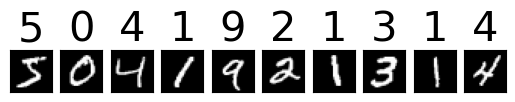

In [8]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(str(y_train[i]), fontsize=30)


In [9]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
plt.figure(figsize=(24, 3))
plt.suptitle("CIFAR-10", fontsize=30)

Text(0.5, 0.98, 'CIFAR-10')

<Figure size 2400x300 with 0 Axes>

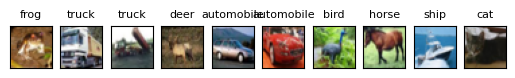

In [12]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])  
    plt.title(classes[y_train[i][0]], fontsize=8)

필기 숫자 인식

다층 퍼셉트론으로 MNIST 인식하기(SGD 옵티마이저)

In [15]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [17]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

In [18]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [19]:
mlp = Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
mlp.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [21]:
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
469/469 - 1s - 3ms/step - accuracy: 0.1505 - loss: 0.0904 - val_accuracy: 0.2324 - val_loss: 0.0876
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.2800 - loss: 0.0848 - val_accuracy: 0.3220 - val_loss: 0.0818
Epoch 3/50
469/469 - 1s - 2ms/step - accuracy: 0.3576 - loss: 0.0791 - val_accuracy: 0.3920 - val_loss: 0.0762
Epoch 4/50
469/469 - 1s - 2ms/step - accuracy: 0.4448 - loss: 0.0737 - val_accuracy: 0.5047 - val_loss: 0.0707
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.5594 - loss: 0.0680 - val_accuracy: 0.6213 - val_loss: 0.0647
Epoch 6/50
469/469 - 1s - 2ms/step - accuracy: 0.6589 - loss: 0.0619 - val_accuracy: 0.6972 - val_loss: 0.0582
Epoch 7/50
469/469 - 1s - 2ms/step - accuracy: 0.7143 - loss: 0.0558 - val_accuracy: 0.7393 - val_loss: 0.0523
Epoch 8/50
469/469 - 1s - 2ms/step - accuracy: 0.7481 - loss: 0.0505 - val_accuracy: 0.7660 - val_loss: 0.0473
Epoch 9/50
469/469 - 1s - 2ms/step - accuracy: 0.7720 - loss: 0.0461 - val_accuracy: 0.7904 - val_loss: 0.0433
E

In [22]:
res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률=", res[1]*100)

정확률= 89.5799994468689


Adam 옵티마이저를 사용하여 성능 향상

In [24]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [26]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

In [27]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [28]:
mlp=Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

In [29]:
mlp.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [30]:
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
469/469 - 2s - 3ms/step - accuracy: 0.9031 - loss: 0.0148 - val_accuracy: 0.9316 - val_loss: 0.0105
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.9433 - loss: 0.0089 - val_accuracy: 0.9504 - val_loss: 0.0076
Epoch 3/50
469/469 - 1s - 2ms/step - accuracy: 0.9591 - loss: 0.0065 - val_accuracy: 0.9594 - val_loss: 0.0061
Epoch 4/50
469/469 - 1s - 2ms/step - accuracy: 0.9687 - loss: 0.0050 - val_accuracy: 0.9670 - val_loss: 0.0050
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.9748 - loss: 0.0041 - val_accuracy: 0.9693 - val_loss: 0.0046
Epoch 6/50
469/469 - 1s - 2ms/step - accuracy: 0.9794 - loss: 0.0034 - val_accuracy: 0.9714 - val_loss: 0.0044
Epoch 7/50
469/469 - 1s - 2ms/step - accuracy: 0.9841 - loss: 0.0028 - val_accuracy: 0.9733 - val_loss: 0.0039
Epoch 8/50
469/469 - 1s - 2ms/step - accuracy: 0.9864 - loss: 0.0024 - val_accuracy: 0.9745 - val_loss: 0.0039
Epoch 9/50
469/469 - 1s - 2ms/step - accuracy: 0.9883 - loss: 0.0021 - val_accuracy: 0.9751 - val_loss: 0.0036
E

In [31]:
res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

정확률= 98.29999804496765


# 성능 시각화

SGD와 Adam 성능을 그래프로 비교

In [34]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [36]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()

In [37]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


In [38]:
mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))


In [39]:
mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [40]:
hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

Epoch 1/50
469/469 - 1s - 3ms/step - accuracy: 0.3078 - loss: 0.0856 - val_accuracy: 0.4339 - val_loss: 0.0819
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.4903 - loss: 0.0780 - val_accuracy: 0.5442 - val_loss: 0.0738
Epoch 3/50
469/469 - 1s - 2ms/step - accuracy: 0.5849 - loss: 0.0699 - val_accuracy: 0.6201 - val_loss: 0.0657
Epoch 4/50
469/469 - 1s - 2ms/step - accuracy: 0.6399 - loss: 0.0624 - val_accuracy: 0.6573 - val_loss: 0.0586
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.6729 - loss: 0.0561 - val_accuracy: 0.6890 - val_loss: 0.0529
Epoch 6/50
469/469 - 1s - 2ms/step - accuracy: 0.7021 - loss: 0.0511 - val_accuracy: 0.7227 - val_loss: 0.0484
Epoch 7/50
469/469 - 1s - 2ms/step - accuracy: 0.7295 - loss: 0.0471 - val_accuracy: 0.7502 - val_loss: 0.0446
Epoch 8/50
469/469 - 1s - 2ms/step - accuracy: 0.7532 - loss: 0.0438 - val_accuracy: 0.7739 - val_loss: 0.0415
Epoch 9/50
469/469 - 1s - 2ms/step - accuracy: 0.7737 - loss: 0.0410 - val_accuracy: 0.7955 - val_loss: 0.0387
E

In [41]:
print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

SGD 정확률= 89.81000185012817


In [42]:
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

In [43]:
mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [44]:
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

Epoch 1/50
469/469 - 2s - 3ms/step - accuracy: 0.8993 - loss: 0.0151 - val_accuracy: 0.9326 - val_loss: 0.0104
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.9426 - loss: 0.0089 - val_accuracy: 0.9491 - val_loss: 0.0078
Epoch 3/50
469/469 - 1s - 2ms/step - accuracy: 0.9586 - loss: 0.0065 - val_accuracy: 0.9585 - val_loss: 0.0065
Epoch 4/50
469/469 - 1s - 2ms/step - accuracy: 0.9689 - loss: 0.0051 - val_accuracy: 0.9665 - val_loss: 0.0053
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.9751 - loss: 0.0041 - val_accuracy: 0.9703 - val_loss: 0.0047
Epoch 6/50
469/469 - 1s - 2ms/step - accuracy: 0.9794 - loss: 0.0034 - val_accuracy: 0.9738 - val_loss: 0.0042
Epoch 7/50
469/469 - 1s - 2ms/step - accuracy: 0.9834 - loss: 0.0028 - val_accuracy: 0.9732 - val_loss: 0.0041
Epoch 8/50
469/469 - 1s - 2ms/step - accuracy: 0.9859 - loss: 0.0024 - val_accuracy: 0.9762 - val_loss: 0.0036
Epoch 9/50
469/469 - 1s - 2ms/step - accuracy: 0.9883 - loss: 0.0021 - val_accuracy: 0.9741 - val_loss: 0.0040
E

In [45]:
print('Adam 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

Adam 정확률= 98.15000295639038


In [46]:
import matplotlib.pyplot as plt

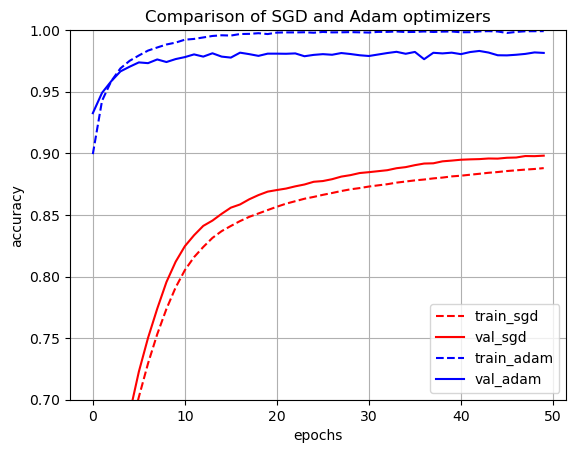

In [47]:
plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd','val_sgd','train_adam','val_adam'])
plt.grid()
plt.show()

# 하이퍼 매개변수 다루기

깊은 다층 퍼셉트론으로 MNIST 인식

In [50]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [52]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()

In [53]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [54]:
dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(784,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

In [55]:
dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [56]:
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

Epoch 1/50
469/469 - 3s - 7ms/step - accuracy: 0.8959 - loss: 0.4004 - val_accuracy: 0.9469 - val_loss: 0.1810
Epoch 2/50
469/469 - 3s - 5ms/step - accuracy: 0.9588 - loss: 0.1443 - val_accuracy: 0.9658 - val_loss: 0.1154
Epoch 3/50
469/469 - 2s - 5ms/step - accuracy: 0.9721 - loss: 0.0980 - val_accuracy: 0.9712 - val_loss: 0.0976
Epoch 4/50
469/469 - 2s - 5ms/step - accuracy: 0.9786 - loss: 0.0726 - val_accuracy: 0.9742 - val_loss: 0.0799
Epoch 5/50
469/469 - 2s - 5ms/step - accuracy: 0.9838 - loss: 0.0557 - val_accuracy: 0.9758 - val_loss: 0.0761
Epoch 6/50
469/469 - 2s - 5ms/step - accuracy: 0.9881 - loss: 0.0414 - val_accuracy: 0.9768 - val_loss: 0.0705
Epoch 7/50
469/469 - 3s - 5ms/step - accuracy: 0.9908 - loss: 0.0320 - val_accuracy: 0.9788 - val_loss: 0.0707
Epoch 8/50
469/469 - 3s - 5ms/step - accuracy: 0.9932 - loss: 0.0244 - val_accuracy: 0.9800 - val_loss: 0.0667
Epoch 9/50
469/469 - 2s - 5ms/step - accuracy: 0.9950 - loss: 0.0185 - val_accuracy: 0.9790 - val_loss: 0.0714
E

In [57]:
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

정확률= 98.47000241279602


In [58]:
dmlp.save('dmlp_trained.h5')

In [59]:
import matplotlib.pyplot as plt

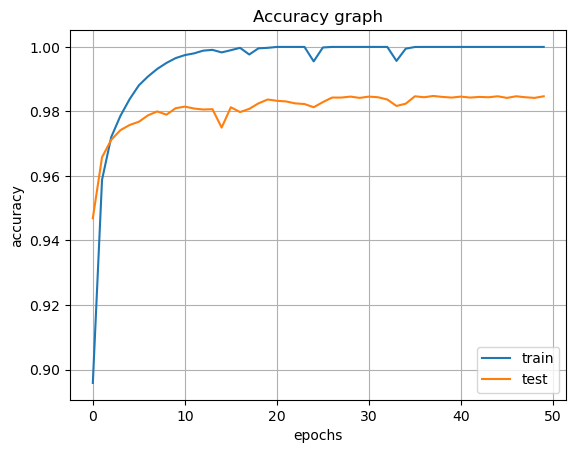

In [60]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

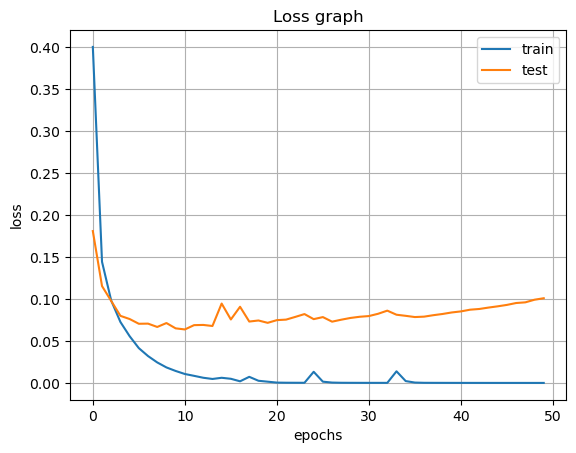

In [61]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

# 자연 영상 인식

깊은 다층 퍼셉트론으로 CIFAR-10 인식하기

In [64]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [66]:
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()

In [67]:
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [68]:
dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

In [69]:
dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [70]:
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

Epoch 1/50
391/391 - 6s - 14ms/step - accuracy: 0.3506 - loss: 1.8159 - val_accuracy: 0.4006 - val_loss: 1.7023
Epoch 2/50
391/391 - 5s - 12ms/step - accuracy: 0.4221 - loss: 1.6217 - val_accuracy: 0.4433 - val_loss: 1.5652
Epoch 3/50
391/391 - 5s - 12ms/step - accuracy: 0.4533 - loss: 1.5378 - val_accuracy: 0.4370 - val_loss: 1.5779
Epoch 4/50
391/391 - 5s - 12ms/step - accuracy: 0.4777 - loss: 1.4728 - val_accuracy: 0.4850 - val_loss: 1.4664
Epoch 5/50
391/391 - 5s - 12ms/step - accuracy: 0.4938 - loss: 1.4274 - val_accuracy: 0.4910 - val_loss: 1.4360
Epoch 6/50
391/391 - 5s - 12ms/step - accuracy: 0.5105 - loss: 1.3800 - val_accuracy: 0.4951 - val_loss: 1.4251
Epoch 7/50
391/391 - 5s - 12ms/step - accuracy: 0.5286 - loss: 1.3383 - val_accuracy: 0.4996 - val_loss: 1.3986
Epoch 8/50
391/391 - 5s - 12ms/step - accuracy: 0.5406 - loss: 1.3011 - val_accuracy: 0.5192 - val_loss: 1.3691
Epoch 9/50
391/391 - 5s - 12ms/step - accuracy: 0.5490 - loss: 1.2744 - val_accuracy: 0.5234 - val_loss:

In [71]:
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

정확률= 54.75999712944031


In [72]:
# dmlp.save('dmlp_trained.h5')

In [73]:
import matplotlib.pyplot as plt

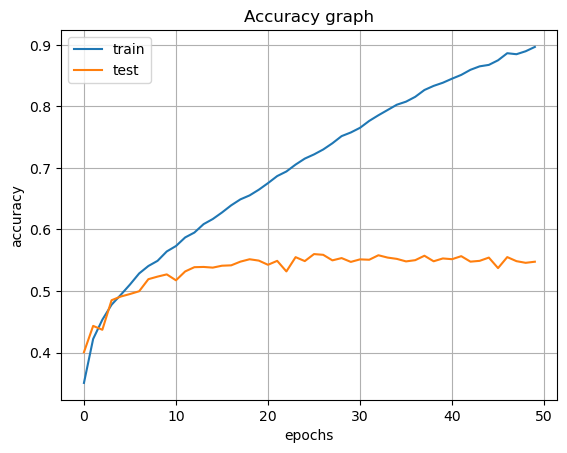

In [74]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

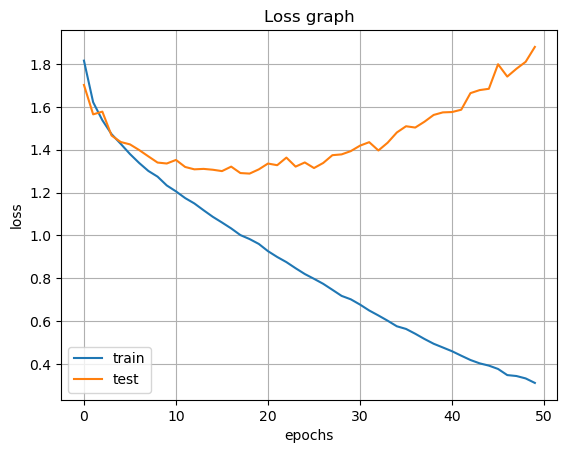

In [75]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()